In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings for clean output
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set(style="whitegrid")


In [2]:
# Load features and activity labels
features = pd.read_csv('UCI HAR Dataset/features.txt', sep='\s+', header=None, names=['index', 'feature'])
activities = pd.read_csv('UCI HAR Dataset/activity_labels.txt', sep='\s+', header=None, names=['index', 'activity'])

# Extract only feature names
feature_names = features['feature'].values

# Load training data
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = feature_names
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None, names=['Activity'])
subject_train = pd.read_csv('UCI HAR Dataset/train/subject_train.txt', header=None, names=['Subject'])

# Load testing data
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = feature_names
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', header=None, names=['Activity'])
subject_test = pd.read_csv('UCI HAR Dataset/test/subject_test.txt', header=None, names=['Subject'])


In [3]:
import os
os.getcwd()


'C:\\Users\\Shashwati B.U\\har-project'

In [4]:
# Load features and activity labels
features = pd.read_csv('UCI HAR Dataset/features.txt', sep='\s+', header=None, names=['index', 'feature'])
activities = pd.read_csv('UCI HAR Dataset/activity_labels.txt', sep='\s+', header=None, names=['index', 'activity'])

# Load training data
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = features['feature'].values
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None, names=['Activity'])
subject_train = pd.read_csv('UCI HAR Dataset/train/subject_train.txt', header=None, names=['Subject'])

# Load testing data
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = features['feature'].values
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', header=None, names=['Activity'])
subject_test = pd.read_csv('UCI HAR Dataset/test/subject_test.txt', header=None, names=['Subject'])


In [5]:
# Combine train and test sets
X = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
y = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)
subjects = pd.concat([subject_train, subject_test], axis=0).reset_index(drop=True)

# Combine everything into one DataFrame
data = pd.concat([subjects, y, X], axis=1)

# Show the shape and a preview
print("Data shape:", data.shape)
data.head()


Data shape: (10299, 563)


,Subject,Activity,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,1,5,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,5,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,5,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,5,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,5,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [6]:
# Map activity numbers to names
activity_labels = dict(zip(activities['index'], activities['activity']))
data['Activity'] = data['Activity'].map(activity_labels)

# Check again
data[['Subject', 'Activity']].head()


,Subject,Activity
0,1,STANDING
1,1,STANDING
2,1,STANDING
3,1,STANDING
4,1,STANDING


In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming you're loading the data properly as in previous steps:
try:
    print("Loading features and activity labels...")
    features = pd.read_csv(r'UCI HAR Dataset/features.txt', sep=r'\s+', header=None, names=['index', 'feature'])
    activities = pd.read_csv(r'UCI HAR Dataset/activity_labels.txt', sep=r'\s+', header=None, names=['index', 'activity'])
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
    exit()

# Extract feature names
feature_names = features['feature'].values

# Load training data
try:
    print("Loading training data...")
    X_train = pd.read_csv(r'UCI HAR Dataset/train/X_train.txt', sep=r'\s+', header=None)
    X_train.columns = feature_names
    y_train = pd.read_csv(r'UCI HAR Dataset/train/y_train.txt', header=None, names=['Activity'])
    subject_train = pd.read_csv(r'UCI HAR Dataset/train/subject_train.txt', header=None, names=['Subject'])
except FileNotFoundError as e:
    print(f"Error loading training data files: {e}")
    exit()

# Load testing data
try:
    print("Loading testing data...")
    X_test = pd.read_csv(r'UCI HAR Dataset/test/X_test.txt', sep=r'\s+', header=None)
    X_test.columns = feature_names
    y_test = pd.read_csv(r'UCI HAR Dataset/test/y_test.txt', header=None, names=['Activity'])
    subject_test = pd.read_csv(r'UCI HAR Dataset/test/subject_test.txt', header=None, names=['Subject'])
except FileNotFoundError as e:
    print(f"Error loading testing data files: {e}")
    exit()

# Combine train and test sets
print("Combining training and testing sets...")
X = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
y = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)
subjects = pd.concat([subject_train, subject_test], axis=0).reset_index(drop=True)

# Combine everything into one DataFrame
data = pd.concat([subjects, y, X], axis=1)

# Features and labels
X_features = data.drop(columns=['Subject', 'Activity'])
y_labels = data['Activity']

# Split into train and test sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_features, y_labels, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_split, y_train_split)

# Evaluate
y_pred = clf.predict(X_test_split)
print("Accuracy:", accuracy_score(y_test_split, y_pred))
print(classification_report(y_test_split, y_pred))


Loading features and activity labels...
Loading training data...
Loading testing data...
Combining training and testing sets...
Accuracy: 0.9766990291262136
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       369
           2       0.97      0.98      0.98       270
           3       0.98      0.97      0.97       284
           4       0.97      0.95      0.96       377
           5       0.95      0.96      0.96       354
           6       1.00      1.00      1.00       406

    accuracy                           0.98      2060
   macro avg       0.98      0.98      0.98      2060
weighted avg       0.98      0.98      0.98      2060



In [9]:
import joblib

# Save the trained model
joblib.dump(clf, 'har_model.pkl')

# Later you can load it like this:
# clf = joblib.load('har_model.pkl')




['har_model.pkl']

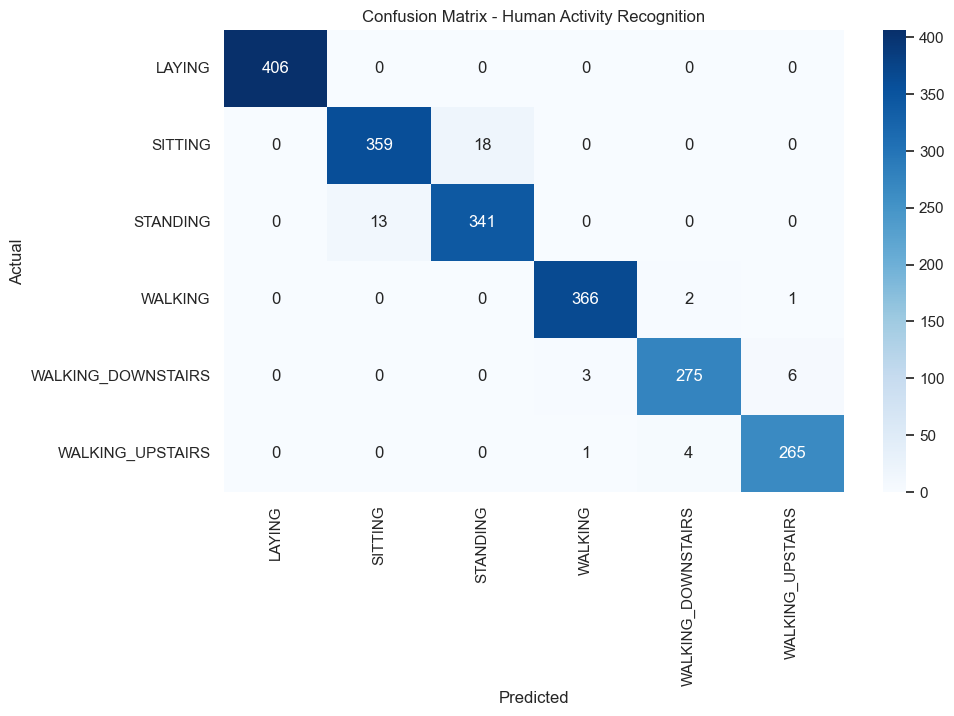

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test_split and y_pred are already defined
cm = confusion_matrix(y_test_split, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Human Activity Recognition')
plt.show()



In [15]:
import joblib

# Save the trained model
joblib.dump(clf, 'har_model.pkl')

# Later you can load it like this:
# clf = joblib.load('har_model.pkl')


['har_model.pkl']

In [18]:
import numpy as np

# Pick a random index from the test set
random_index = np.random.randint(0, len(X_test_split))

# Get the sample and true label using the same index
sample = X_test_split.iloc[random_index]
true_label = y_test_split.iloc[random_index]

# Predict
predicted = clf.predict([sample])[0]

print(f"True Activity:     {true_label}")
print(f"Predicted Activity: {predicted}")


True Activity:     STANDING
Predicted Activity: STANDING


In [19]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = clf.predict(X_test_split)

# Calculate accuracy
accuracy = accuracy_score(y_test_split, y_pred)

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 97.67%


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Features and labels
X_features = data.drop(columns=['Subject', 'Activity'])
y_labels = data['Activity']

# Split into train and test sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_features, y_labels, test_size=0.2, random_state=42)

# Initialize and train K-Nearest Neighbors classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)  # You can tune 'n_neighbors' as needed
knn_clf.fit(X_train_split, y_train_split)

# Predict on the test set
y_pred_knn = knn_clf.predict(X_test_split)

# Calculate and display accuracy
knn_accuracy = accuracy_score(y_test_split, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy * 100:.2f}%")

# Optional: Display detailed classification report
print("Classification Report for K-Nearest Neighbors:")
print(classification_report(y_test_split, y_pred_knn))


K-Nearest Neighbors Accuracy: 95.92%
Classification Report for K-Nearest Neighbors:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       406
           SITTING       0.92      0.88      0.90       377
          STANDING       0.88      0.92      0.90       354
           WALKING       0.99      0.99      0.99       369
WALKING_DOWNSTAIRS       0.99      0.98      0.99       284
  WALKING_UPSTAIRS       0.99      1.00      1.00       270

          accuracy                           0.96      2060
         macro avg       0.96      0.96      0.96      2060
      weighted avg       0.96      0.96      0.96      2060



In [1]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load features and activity labels
try:
    print("Loading features and activity labels...")
    features = pd.read_csv(r'UCI HAR Dataset/features.txt', sep=r'\s+', header=None, names=['index', 'feature'])
    activities = pd.read_csv(r'UCI HAR Dataset/activity_labels.txt', sep=r'\s+', header=None, names=['index', 'activity'])
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
    exit()

# Extract feature names
feature_names = features['feature'].values

# Load training data
try:
    print("Loading training data...")
    X_train = pd.read_csv(r'UCI HAR Dataset/train/X_train.txt', sep=r'\s+', header=None)
    X_train.columns = feature_names
    y_train = pd.read_csv(r'UCI HAR Dataset/train/y_train.txt', header=None, names=['Activity'])
    subject_train = pd.read_csv(r'UCI HAR Dataset/train/subject_train.txt', header=None, names=['Subject'])
except FileNotFoundError as e:
    print(f"Error loading training data files: {e}")
    exit()

# Load testing data
try:
    print("Loading testing data...")
    X_test = pd.read_csv(r'UCI HAR Dataset/test/X_test.txt', sep=r'\s+', header=None)
    X_test.columns = feature_names
    y_test = pd.read_csv(r'UCI HAR Dataset/test/y_test.txt', header=None, names=['Activity'])
    subject_test = pd.read_csv(r'UCI HAR Dataset/test/subject_test.txt', header=None, names=['Subject'])
except FileNotFoundError as e:
    print(f"Error loading testing data files: {e}")
    exit()

# Combine train and test sets
print("Combining training and testing sets...")
X = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
y = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)
subjects = pd.concat([subject_train, subject_test], axis=0).reset_index(drop=True)

# Combine everything into one DataFrame
data = pd.concat([subjects, y, X], axis=1)

# Features and labels
X_features = data.drop(columns=['Subject', 'Activity'])
y_labels = data['Activity']

# Split into train and test sets
print("Splitting data into training and testing sets...")
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_features, y_labels, test_size=0.2, random_state=42
)

# Initialize and train Bagging Classifier with Decision Tree as base estimator
print("Training started...")
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

# Add debugging prints to monitor progress
try:
    bagging_clf.fit(X_train_split, y_train_split)
    print("Training completed!")
except Exception as e:
    print(f"Training error: {e}")
    exit()

# Predict on the test set
print("Predicting...")
y_pred_bagging = bagging_clf.predict(X_test_split)
print("Prediction completed!")

# Calculate and display accuracy
bagging_accuracy = accuracy_score(y_test_split, y_pred_bagging)
print(f"\nBagging Classifier Accuracy: {bagging_accuracy * 100:.2f}%")

# Display classification report
print("\nClassification Report for Bagging Classifier:")
print(classification_report(y_test_split, y_pred_bagging))


Loading features and activity labels...
Loading training data...
Loading testing data...
Combining training and testing sets...
Splitting data into training and testing sets...
Training started...
Training completed!
Predicting...
Prediction completed!

Bagging Classifier Accuracy: 96.46%

Classification Report for Bagging Classifier:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       369
           2       0.95      0.97      0.96       270
           3       0.99      0.94      0.96       284
           4       0.93      0.95      0.94       377
           5       0.95      0.92      0.93       354
           6       1.00      1.00      1.00       406

    accuracy                           0.96      2060
   macro avg       0.96      0.96      0.96      2060
weighted avg       0.96      0.96      0.96      2060



In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Load features and activity labels
features = pd.read_csv(r'UCI HAR Dataset/features.txt', sep=r'\s+', header=None, names=['index', 'feature'])
feature_names = features['feature'].values

# Load training data
X_train = pd.read_csv(r'UCI HAR Dataset/train/X_train.txt', sep=r'\s+', header=None)
X_train.columns = feature_names
y_train = pd.read_csv(r'UCI HAR Dataset/train/y_train.txt', header=None, names=['Activity'])
subject_train = pd.read_csv(r'UCI HAR Dataset/train/subject_train.txt', header=None, names=['Subject'])

# Load testing data
X_test = pd.read_csv(r'UCI HAR Dataset/test/X_test.txt', sep=r'\s+', header=None)
X_test.columns = feature_names
y_test = pd.read_csv(r'UCI HAR Dataset/test/y_test.txt', header=None, names=['Activity'])
subject_test = pd.read_csv(r'UCI HAR Dataset/test/subject_test.txt', header=None, names=['Subject'])

# Combine training and testing sets
X = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
y = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)
subjects = pd.concat([subject_train, subject_test], axis=0).reset_index(drop=True)

# Create a combined DataFrame
data = pd.concat([subjects, y, X], axis=1)

# Feature selection and target
X_features = data.drop(columns=['Subject', 'Activity'])
y_labels = data['Activity']

# Train-test split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_features, y_labels, test_size=0.2, random_state=42
)

# Initialize and train Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_split, y_train_split)

# Predict
y_pred_dt = dt_clf.predict(X_test_split)

# Evaluate
accuracy_dt = accuracy_score(y_test_split, y_pred_dt)
print("Algorithm: Decision Tree Classifier")
print(f"Accuracy: {accuracy_dt * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_split, y_pred_dt))


Algorithm: Decision Tree Classifier
Accuracy: 93.01%

Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.95      0.95       369
           2       0.88      0.91      0.90       270
           3       0.96      0.92      0.94       284
           4       0.90      0.89      0.89       377
           5       0.88      0.90      0.89       354
           6       1.00      1.00      1.00       406

    accuracy                           0.93      2060
   macro avg       0.93      0.93      0.93      2060
weighted avg       0.93      0.93      0.93      2060



In [5]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load feature names and activity labels
print("Loading feature names and activity labels...")
features = pd.read_csv(r'UCI HAR Dataset/features.txt', sep=r'\s+', header=None, names=['index', 'feature'])
feature_names = features['feature'].values

activities = pd.read_csv(r'UCI HAR Dataset/activity_labels.txt', sep=r'\s+', header=None, names=['index', 'activity'])

# Step 2: Load training data
print("Loading training data...")
X_train = pd.read_csv(r'UCI HAR Dataset/train/X_train.txt', sep=r'\s+', header=None)
X_train.columns = feature_names
y_train = pd.read_csv(r'UCI HAR Dataset/train/y_train.txt', header=None, names=['Activity'])
subject_train = pd.read_csv(r'UCI HAR Dataset/train/subject_train.txt', header=None, names=['Subject'])

# Step 3: Load testing data
print("Loading testing data...")
X_test = pd.read_csv(r'UCI HAR Dataset/test/X_test.txt', sep=r'\s+', header=None)
X_test.columns = feature_names
y_test = pd.read_csv(r'UCI HAR Dataset/test/y_test.txt', header=None, names=['Activity'])
subject_test = pd.read_csv(r'UCI HAR Dataset/test/subject_test.txt', header=None, names=['Subject'])

# Step 4: Combine train and test sets
print("Combining datasets...")
X = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
y = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)
subjects = pd.concat([subject_train, subject_test], axis=0).reset_index(drop=True)

# Combine all into a single DataFrame (optional)
data = pd.concat([subjects, y, X], axis=1)

# Step 5: Feature matrix and labels
X_features = data.drop(columns=['Subject', 'Activity'])
y_labels = data['Activity']

# Step 6: Train-test split
print("Splitting data...")
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_features, y_labels, test_size=0.2, random_state=42
)

# Step 7: Initialize and train SVM classifier
print("Training Support Vector Machine...")
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_clf.fit(X_train_split, y_train_split)
print("Training complete!")

# Step 8: Prediction
print("Predicting...")
y_pred_svm = svm_clf.predict(X_test_split)

# Step 9: Evaluation
accuracy_svm = accuracy_score(y_test_split, y_pred_svm)
print(f"\nSVM Classifier Accuracy: {accuracy_svm * 100:.2f}%")

print("\nClassification Report for SVM Classifier:")
print(classification_report(y_test_split, y_pred_svm))


Loading feature names and activity labels...
Loading training data...
Loading testing data...
Combining datasets...
Splitting data...
Training Support Vector Machine...
Training complete!
Predicting...

SVM Classifier Accuracy: 97.23%

Classification Report for SVM Classifier:
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       369
           2       0.99      0.99      0.99       270
           3       0.99      0.99      0.99       284
           4       0.93      0.94      0.94       377
           5       0.94      0.92      0.93       354
           6       1.00      1.00      1.00       406

    accuracy                           0.97      2060
   macro avg       0.97      0.97      0.97      2060
weighted avg       0.97      0.97      0.97      2060



In [6]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load feature names and activity labels
print("Loading feature names and activity labels...")
features = pd.read_csv(r'UCI HAR Dataset/features.txt', sep=r'\s+', header=None, names=['index', 'feature'])
feature_names = features['feature'].values

activities = pd.read_csv(r'UCI HAR Dataset/activity_labels.txt', sep=r'\s+', header=None, names=['index', 'activity'])

# Step 2: Load training data
print("Loading training data...")
X_train = pd.read_csv(r'UCI HAR Dataset/train/X_train.txt', sep=r'\s+', header=None)
X_train.columns = feature_names
y_train = pd.read_csv(r'UCI HAR Dataset/train/y_train.txt', header=None, names=['Activity'])
subject_train = pd.read_csv(r'UCI HAR Dataset/train/subject_train.txt', header=None, names=['Subject'])

# Step 3: Load testing data
print("Loading testing data...")
X_test = pd.read_csv(r'UCI HAR Dataset/test/X_test.txt', sep=r'\s+', header=None)
X_test.columns = feature_names
y_test = pd.read_csv(r'UCI HAR Dataset/test/y_test.txt', header=None, names=['Activity'])
subject_test = pd.read_csv(r'UCI HAR Dataset/test/subject_test.txt', header=None, names=['Subject'])

# Step 4: Combine train and test sets
print("Combining datasets...")
X = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
y = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)
subjects = pd.concat([subject_train, subject_test], axis=0).reset_index(drop=True)

# Optional full dataset (Subject + Activity + Features)
data = pd.concat([subjects, y, X], axis=1)

# Step 5: Feature matrix and labels
X_features = data.drop(columns=['Subject', 'Activity'])
y_labels = data['Activity']

# Step 6: Split the data
print("Splitting data into train and test...")
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_features, y_labels, test_size=0.2, random_state=42
)

# Step 7: Initialize and train LDA classifier
print("Training Linear Discriminant Analysis classifier...")
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train_split, y_train_split)
print("Training complete!")

# Step 8: Predict
print("Predicting...")
y_pred_lda = lda_clf.predict(X_test_split)

# Step 9: Evaluate
accuracy_lda = accuracy_score(y_test_split, y_pred_lda)
print(f"\nLDA Classifier Accuracy: {accuracy_lda * 100:.2f}%")

print("\nClassification Report for LDA Classifier:")
print(classification_report(y_test_split, y_pred_lda))


Loading feature names and activity labels...
Loading training data...
Loading testing data...
Combining datasets...
Splitting data into train and test...
Training Linear Discriminant Analysis classifier...
Training complete!
Predicting...

LDA Classifier Accuracy: 97.57%

Classification Report for LDA Classifier:
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       369
           2       0.99      1.00      0.99       270
           3       1.00      1.00      1.00       284
           4       0.94      0.93      0.94       377
           5       0.94      0.94      0.94       354
           6       0.99      1.00      1.00       406

    accuracy                           0.98      2060
   macro avg       0.98      0.98      0.98      2060
weighted avg       0.98      0.98      0.98      2060

